<a href="https://colab.research.google.com/github/rudycav/Web-Scraping-CoronaVirus-Cases/blob/master/Project/%20CoronaVirus_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
from pandas import DataFrame
import pandas as pd
from datetime import datetime
import numpy as np
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def webscrape(url = 'https://www.worldometers.info/coronavirus/'):
  header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}
  link = requests.get(url, header)
  bs = BeautifulSoup(link.content,'lxml')
  title_numbers = bs.find_all(['h1','span'])
  numbers = bs.find_all(class_='maincounter-number')
  data_table = bs.find_all('table', class_='main_table_countries')
   
  data = []

  for table in data_table:
      headers = []
      rows = table.find_all('tr')
      for header in table.find('tr').find_all('th'):
          headers.append(header.text)
      for row in table.find_all('tr')[1:]:
          values = []
          for column in row.find_all(['th', 'td']):
              values.append(column.text)
          if values:
              dt = {headers[i]: values[i] for i in range(len(values))}
              data.append(dt)
              
  df = pd.DataFrame(data).rename(columns={"1stcase": "FirstCase", "Serious,Critical": "Critical"})
  return df


In [2]:
'''
date = datetime.now()
date_time = date.strftime("%m/%d/%Y %H:%M:%S")

print('COVID-19 CORONAVIRUS PANDEMIC')
print('As of', date_time)
print()
print('Cases : ', title_numbers[5].text)
print('Deaths : ', title_numbers[7].text)
print('Recovered : ', title_numbers[9].text)

'''

'\ndate = datetime.now()\ndate_time = date.strftime("%m/%d/%Y %H:%M:%S")\n\nprint(\'COVID-19 CORONAVIRUS PANDEMIC\')\nprint(\'As of\', date_time)\nprint()\nprint(\'Cases : \', title_numbers[5].text)\nprint(\'Deaths : \', title_numbers[7].text)\nprint(\'Recovered : \', title_numbers[9].text)\n\n'

In [3]:
df = webscrape()

def punctuation_removal(df):
    try:
        #removes N/A, commas, and + symbol, converts empty cells into 0s from the dataframe
        df = df.str.replace('N/A','').str.replace(',','').replace(r'^\s*$', np.nan, regex=True).replace(np.nan, 0).astype(float).astype(int)
    except:
        pass
    return df

df = df.apply(punctuation_removal)


In [4]:
#remove newline in Country column
df['Country,Other'] = df['Country,Other'].replace(r'\n',' ', regex=True) 

In [5]:
df.dtypes

#                       int64
Country,Other          object
TotalCases              int64
NewCases                int64
TotalDeaths             int64
NewDeaths               int64
TotalRecovered          int64
NewRecovered            int64
ActiveCases             int64
Critical                int64
Tot Cases/1M pop        int64
Deaths/1M pop           int64
TotalTests              int64
Tests/\n1M pop\n        int64
Population              int64
Continent              object
1 Caseevery X ppl       int64
1 Deathevery X ppl      int64
1 Testevery X ppl       int64
New Cases/1M pop        int64
New Deaths/1M pop       int64
Active Cases/1M pop     int64
dtype: object

In [6]:
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,0,North America,116730667,0,1542862,0,111806296,2623,3381509,7961,...,0,0,0,North America,0,0,0,0,0,0
1,0,Asia,190665272,113685,1481718,233,184810205,80837,4373349,10622,...,0,0,0,Asia,0,0,0,0,0,0
2,0,Europe,229088216,49849,1924447,202,221983717,120421,5180052,9962,...,0,0,0,Europe,0,0,0,0,0,0
3,0,South America,64170458,68,1330553,0,62471681,2288,368224,10211,...,0,0,0,South America,0,0,0,0,0,0
4,0,Oceania,12439807,9084,21143,42,12292458,13260,126206,99,...,0,0,0,Australia/Oceania,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,0,Total:,64158233,12527,1330358,126,62452436,26134,375439,10214,...,0,0,0,South America,0,0,0,0,0,0
734,0,Total:,12426135,4628,21082,19,12274032,5163,131021,97,...,0,0,0,Australia/Oceania,0,0,0,0,0,0
735,0,Total:,12651567,735,257663,10,11994122,3608,399782,1015,...,0,0,0,Africa,0,0,0,0,0,0
736,0,Total:,721,0,15,0,706,0,0,0,...,0,0,0,,0,0,0,0,0,0


In [7]:
#countries_df = df.iloc[8:] 
countries_df = df[8:-8] 
#continents_df = df.iloc[:6]

In [8]:
countries_df.TotalCases

8      98474755
9      44606460
10     35705236
11     34750108
12     33826367
         ...   
725          80
726          29
727          20
728          10
729           9
Name: TotalCases, Length: 722, dtype: int64

In [9]:
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

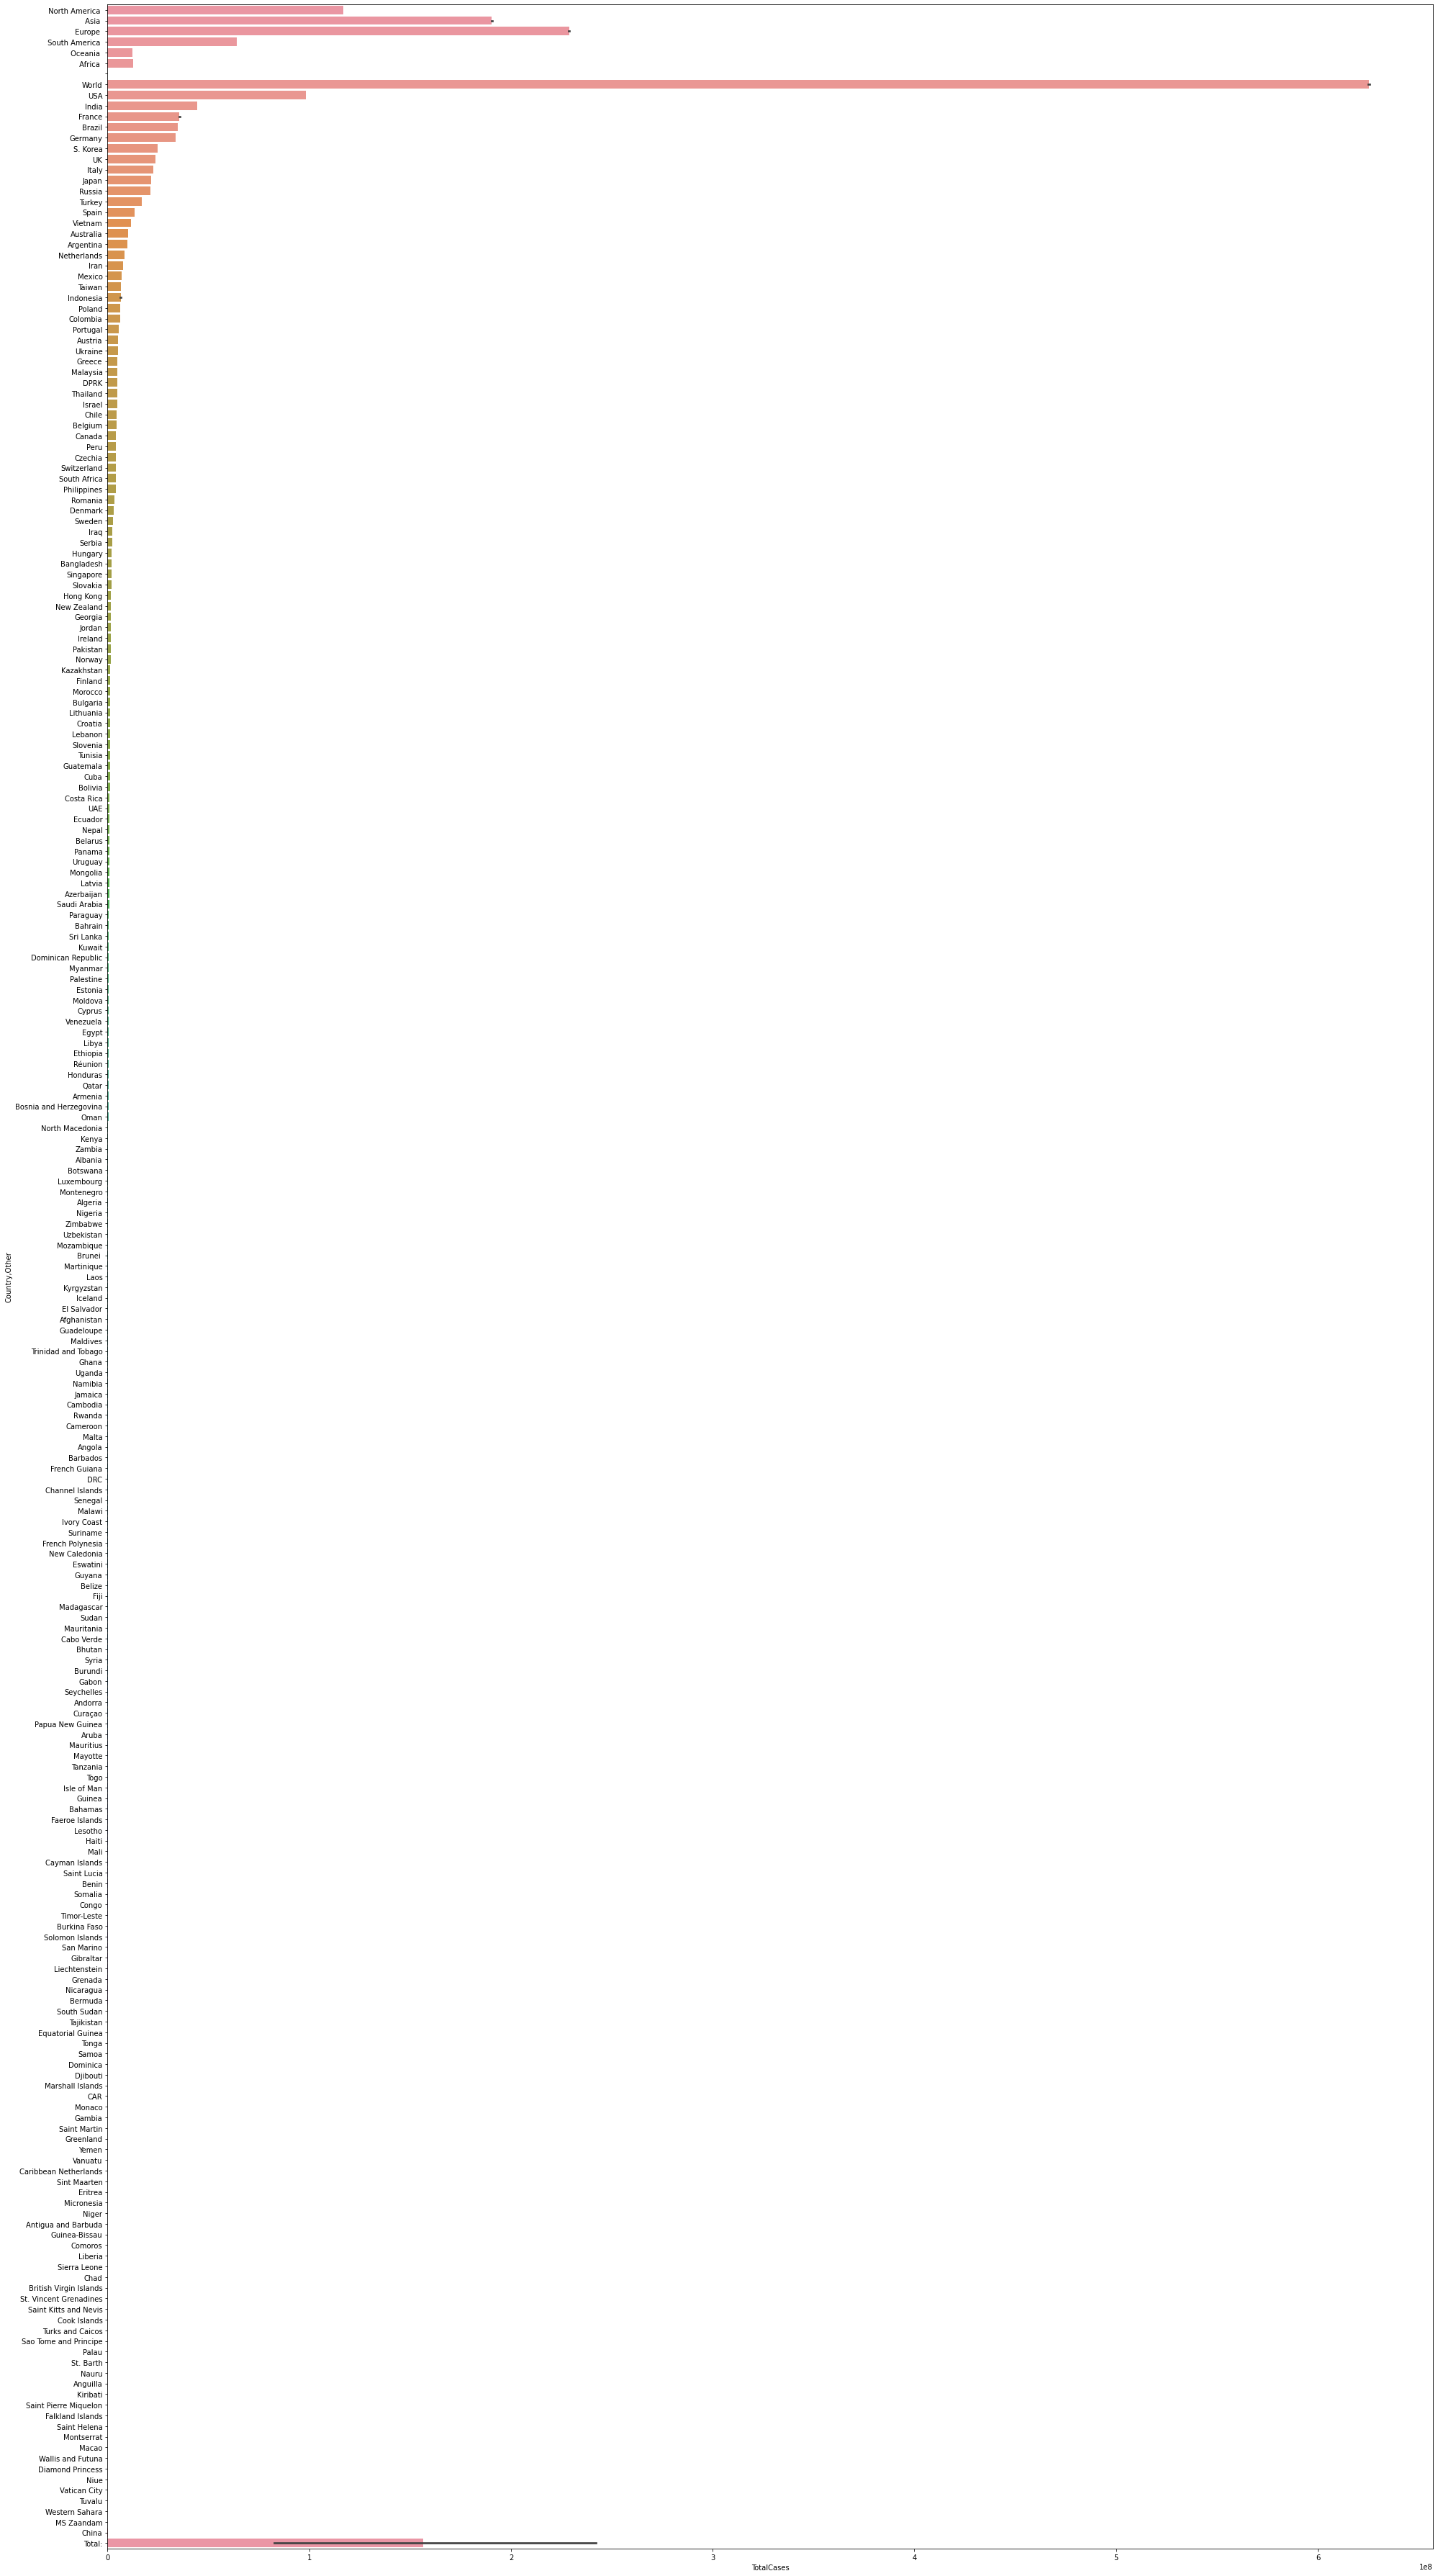

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(33, 65))
barplot = sns.barplot(x = df.TotalCases, y = df['Country,Other'], data = df)





In [11]:
print('matplotlib: {}'.format(matplotlib.__version__))